In [1]:
import pandas as pd 
import numpy as np


In [2]:
df= pd.read_csv('sample.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0.5,1.7148,1.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0.5,0.5108,0.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0.5,0.3096,0.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0.5,3.5060,1.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0.5,0.2832,0.0,2.0,2.0,2.0,0.0,2.0,2.0


In [6]:
# Assuming 'Risk' is the target variable for prediction
X = df.drop('Risk', axis=1)  # Features
y = df['Risk']  # Target

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [23]:
import warnings
warnings.filterwarnings('ignore')

mod=LogisticRegression(max_iter=1000)

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.9589017798900382
testing 0.8636752136752136


In [30]:
model = LogisticRegression()

# create the sequential forward selector
sfs = SFS(model, k_features=3, forward=True, scoring='accuracy')

# fit the selector to the data
sfs.fit(X_train, y_train)

# get the best score and feature names
best_score = sfs.k_score_
best_features = sfs.k_feature_names_

# print the results
print('Best score:', best_score)
print('Best features:', best_features)

Best score: 0.9917626337894596
Best features: ('Sector_score', 'Score_A', 'Audit_Risk')


In [31]:
from sklearn.model_selection import cross_val_score

X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.9656381045568911
testing 0.9179487179487179


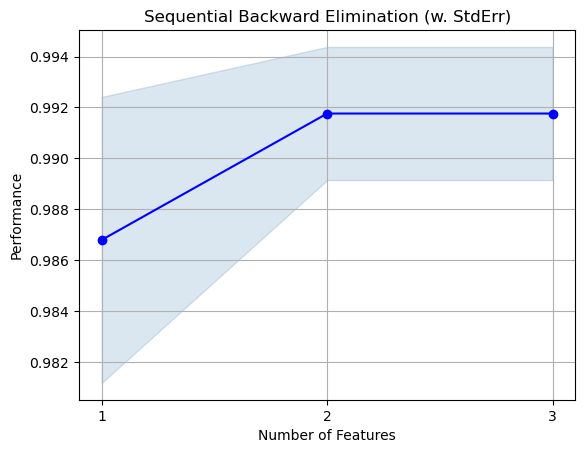

In [32]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [35]:
# create the sequential forward selector
sfs1 = SFS(model, k_features=2, forward=True, scoring='accuracy')

# fit the selector to the data
sfs1.fit(X_train, y_train)

# get the best score and feature names
best_score1 = sfs1.k_score_
best_features1 = sfs1.k_feature_names_

# print the results
print('Best score:', best_score1)
print('Best features:', best_features1)

Best score: 0.9917626337894596
Best features: ('Sector_score', 'Audit_Risk')
